In [34]:
from helpers import parse_gpx, identify_features, calculate_abilities, plot_elevation_chart, plot_elevation_chart_with_features
import pandas as pd
import numpy as np
import folium

In [35]:
import re

#string from flammerouge
input_string = """
1. Huisepontweg (+, 1700 m, Km 110.8), 2. Oude Kwaremont (+, 2300 m, Km 137.0), 3. Eikenberg (+, 1200 m, Km 155.2), 4. Holleweg (+, 700 m, Km 157.3), 5. Kerkgate (+, 1400 m, Km 164.3), 6. Jagerij (+, 800 m, Km 166.7), 7. Molenberg (+, 300 m, Km 171.6), 8. Berg Ten Houte (+, 400 m, Km 197.1), 9. Oude Kwaremont (+, 2300 m, Km 219.2), 10. Paterberg (+, 400 m, Km 222.6), 11. Koppenberg (+, 600 m, Km 229.2), 12. Mariaborrestraat (+, 2000 m, Km 235.3), 13. Taaienberg (+, 500 m, Km 237.0), 14. Oude Kruisberg (+, 500 m, Km 245.5), 15. Oude Kwaremont (+, 1500 m, Km 257.0), 16. Paterberg (+, 400 m, Km 260.5).
"""

pattern = re.compile(r'(?P<seq>\d+)\.\s*(?P<name>[^,]+)\s*\(\+\s*,\s*(?P<length>\d+)\s*m,\s*Km\s*(?P<end_km>\d+\.\d+)\)')

matches = pattern.finditer(input_string)
cobble_sections = [
    {
        "seq": int(match.group("seq")),
        "name": match.group("name").strip(),
        "length": int(match.group("length")),
        "start_km": float(match.group("end_km"))*1000 - float(match.group("length")),
        "end_km": float(match.group("end_km"))*1000
    }
    for match in matches
]

cobble_sections


[{'seq': 1,
  'name': 'Huisepontweg',
  'length': 1700,
  'start_km': 109100.0,
  'end_km': 110800.0},
 {'seq': 2,
  'name': 'Oude Kwaremont',
  'length': 2300,
  'start_km': 134700.0,
  'end_km': 137000.0},
 {'seq': 3,
  'name': 'Eikenberg',
  'length': 1200,
  'start_km': 154000.0,
  'end_km': 155200.0},
 {'seq': 4,
  'name': 'Holleweg',
  'length': 700,
  'start_km': 156600.0,
  'end_km': 157300.0},
 {'seq': 5,
  'name': 'Kerkgate',
  'length': 1400,
  'start_km': 162900.0,
  'end_km': 164300.0},
 {'seq': 6,
  'name': 'Jagerij',
  'length': 800,
  'start_km': 165900.0,
  'end_km': 166700.0},
 {'seq': 7,
  'name': 'Molenberg',
  'length': 300,
  'start_km': 171300.0,
  'end_km': 171600.0},
 {'seq': 8,
  'name': 'Berg Ten Houte',
  'length': 400,
  'start_km': 196700.0,
  'end_km': 197100.0},
 {'seq': 9,
  'name': 'Oude Kwaremont',
  'length': 2300,
  'start_km': 216900.0,
  'end_km': 219200.0},
 {'seq': 10,
  'name': 'Paterberg',
  'length': 400,
  'start_km': 222200.0,
  'end_km': 2

In [46]:
#file_path = 'data/TdF-stage-17-route.gpx'
#file_path = 'data/RvV2023.gpx'
#file_path = 'data/cholet-pays-de-la-loire-2023.gpx'
file_path = 'data/giro-next-gen-2024-stage-3.gpx'
#file_path = 'data/itzulia-2024-stage-6.gpx'
#file_path = 'data/scotland-2023-me-rr.gpx'
#file_path = 'data/tdf-2024-stage-6.gpx'
#file_path = 'data/tour-of-slovenia-2019-stage-4.gpx'
regularized_points, total_distance, points = parse_gpx(file_path, min_distance=500)
features = identify_features(regularized_points)
abilities = calculate_abilities(features, total_distance)


stage_data = {
    'points_raw' : points,
    'points' : regularized_points,
    'features' : features,
    'abilities' : abilities,
    'total_distance' : total_distance,
    'year': 2024,
    'stage': file_path,
}

In [47]:
raw_points = pd.DataFrame( stage_data['points_raw'])

In [48]:
raw_points

,lat,lon,elev,dist
0,45.65262,7.70729,354.0,73.289964
1,45.65232,7.70813,354.0,146.691044
2,45.65208,7.70874,354.0,201.098750
3,45.65182,7.70936,354.0,257.296364
4,45.65152,7.70985,354.0,307.926015
...,...,...,...,...
1808,45.30266,7.19346,1735.0,134026.988802
1809,45.30261,7.19311,1738.0,134054.921306
1810,45.30176,7.19222,1760.0,134188.033925
1811,45.30260,7.18957,1758.0,134418.544804


In [49]:
processed_points = pd.DataFrame(stage_data['points'])

In [50]:
processed_points

,lat,lon,elev,delta_dist,dist,gradient,max_gradient,min_gradient,feature_type
0,45.64987,7.71266,354.0,594.039658,594.039658,-0.168339,0.000000,0.000000,
1,45.64640,7.71745,353.0,536.604961,1130.644619,-0.186357,0.000000,0.000000,
2,45.64195,7.71825,355.0,513.233769,1643.878388,0.389686,0.543946,0.000000,
3,45.63752,7.71961,361.0,503.866161,2147.744549,1.190792,2.579881,-1.650925,
4,45.63379,7.72483,356.0,596.193138,2743.937687,-0.838654,0.000000,-2.376183,
...,...,...,...,...,...,...,...,...,...
239,45.30271,7.20269,1613.0,549.454213,132301.193298,10.555930,13.341385,3.196049,
240,45.30224,7.19851,1658.0,519.579293,132820.772591,8.660853,7.417491,0.000000,
241,45.30255,7.19706,1691.0,552.856894,133373.629485,5.968995,17.358545,-3.621573,
242,45.30292,7.19534,1725.0,501.349784,133874.979269,6.781692,7.685170,2.298564,


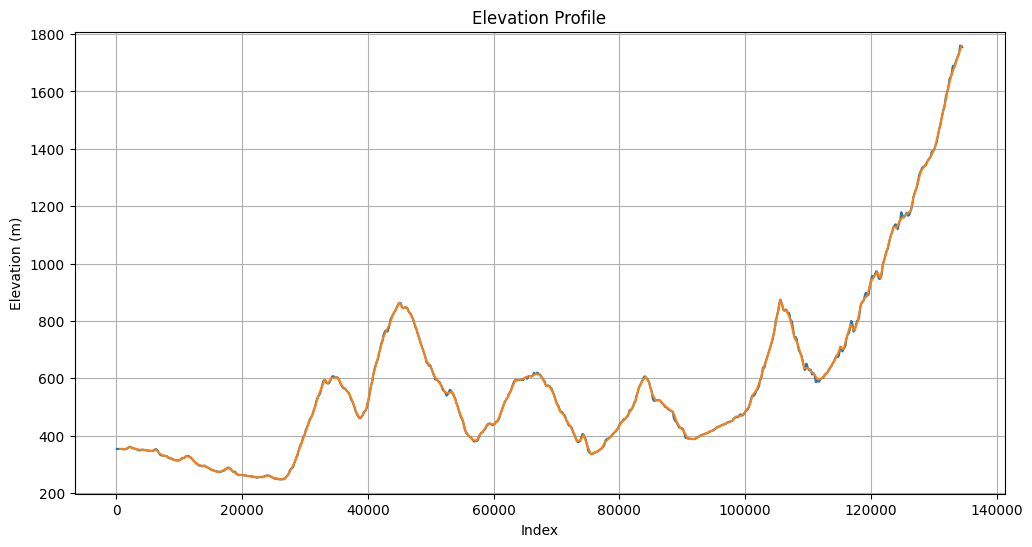

In [51]:
import matplotlib.pyplot as plt


# Plotting the profile
plt.figure(figsize=(12, 6))
plt.plot(raw_points['dist'], raw_points['elev'], label='Initial Data')
plt.plot(processed_points['dist'], processed_points['elev'], label='New Data')
plt.xlabel('Index')
plt.ylabel('Elevation (m)')
plt.title('Elevation Profile')
# Set the y-axis limits
plt.ylim(processed_points['elev'].min()-50, processed_points['elev'].max()+50)
plt.grid(True)

plt.show()

In [52]:
sum(raw_points['lat'] for point in raw_points)

0       182.61048
1       182.60928
2       182.60832
3       182.60728
4       182.60608
          ...    
1808    181.21064
1809    181.21044
1810    181.20704
1811    181.21040
1812    181.21184
Name: lat, Length: 1813, dtype: float64

In [53]:

m = folium.Map(location=[processed_points['lat'].iloc[0], processed_points['lon'].iloc[0]], zoom_start=9)

folium.PolyLine(locations=list(zip(processed_points['lat'], processed_points['lon'])), color='blue', weight=2.5, opacity=1).add_to(m)
m

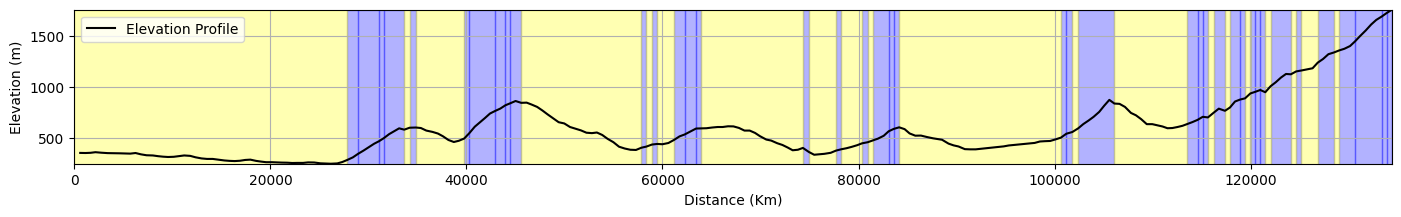

In [56]:
# Convert to DataFrame
stage_df = pd.DataFrame(stage_data['points'])
features_df = pd.DataFrame(stage_data['features'])

# Define color mapping for types
type_colors = {
    'Hills Flat ND': 'blue',
    'Hills Flat': 'blue',
    'Hills ND': 'blue',
    'Hills': 'blue',
    'Climb': 'red',
    'Flat': 'green',
    'Downhill': 'yellow'
}

# Plot the profile chart
plt.figure(figsize=(17, 2))

# Plot elevation profile line
plt.plot(stage_df['dist'], stage_df['elev'], label='Elevation Profile', color='black')

# Plot filled area with colors based on 'type'
for t in type_colors:
    for index, row in features_df[features_df['type'] == t].iterrows():
        plt.fill_betweenx([0, max(stage_df['elev'])], row['start_km'], row['end_km'], color=type_colors[t], alpha=0.3)

# Set the y-axis limits
plt.xlim(0, np.max(stage_df['dist']))
plt.ylim(np.min(stage_df['elev']), np.max(stage_df['elev']))

# Labels and legend
plt.xlabel('Distance (Km)')
plt.ylabel('Elevation (m)')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
stage_data['abilities']

{'Stamina': 100.0,
 'Sprint': 0.0,
 'Climbing': 0.0,
 'Flat': 0.0,
 'Technique': 0.0,
 'Downhill': 0.0,
 'Hills': 0.0,
 'Aggressiveness': 0.0,
 'Teamwork': 0.0}